In [1]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [2]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
pdf = query1_job.to_dataframe()
pdf.head()

NameError: name 'bigquery_client' is not defined

In [3]:
get_ipython().system('pip install db-dtypes')

In [4]:
import os
import pandas
import pandas as pd
import numpy as np
import matplotlib
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
# import lightgbm as lgb
import statsmodels.api as sm
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

CONFIGURE THE BIGQUERY SETTINGS

In [5]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [6]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [7]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
pdf = query1_job.to_dataframe()
pdf.head()

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44


In [8]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [9]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
udf = query1_job.to_dataframe()
udf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [10]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data` d
LEFT JOIN `ironhacks-data.ironhacks_competition.wage_data` i
ON d.uu_id = i.uu_id;
"""

In [11]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
Mdf = query1_job.to_dataframe()
Mdf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,uu_id_1,countyfips_1,tract_1,tract_name_1,average_wage
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,11,0,0,<NA>,<NA>,f013068de98db1470bd986137a0c6d23,18003,900,"Census Tract 9, Allen County, Indiana",8347.125000
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,<NA>,<NA>,0,0,0,21957d5517323845818d87623589e1ba,18089,10400,"Census Tract 104, Lake County, Indiana",7036.636364
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,39,0,0,0,0,6a5609f385912113b6f1014b958ed748,18089,11500,"Census Tract 115, Lake County, Indiana",7890.142857
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,10,0,0,<NA>,<NA>,46b2882ec4c373527ec33f7bd4f1388d,18089,20700,"Census Tract 207, Lake County, Indiana",7534.375000
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,135,<NA>,<NA>,<NA>,<NA>,37495d17e82f7df326bfc2c4c090f7b7,18089,21900,"Census Tract 219, Lake County, Indiana",11825.125000


In [12]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`;
"""

In [13]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
wdf = query_job.to_dataframe()
wdf.head()

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667


In [14]:
# saving data to avoid pulling it each time from the server
wdf.to_csv("wage.csv")
udf.to_csv("unemploy.csv")
Mdf.to_csv("mixed.csv")
pdf.to_csv("pred.csv")

In [15]:
# reading from the saved data
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")
Mdf = pd.read_csv("mixed.csv")
pdf = pd.read_csv("pred.csv")

In [16]:
print(udf["week_number"].unique())
print(Mdf["week_number"].unique())
print(pdf["week_number"].unique())
# udf.nunique()

[16 12 13 29 15 34  5 24 19 28 37 36 27 26 21 20 22  9  3 32 11 14 17  6
 35  7 31  1 10 30 33  2 18  8 25]
[16 12 13 29 15 34  5 24 19 28 37 36 27 26 21 20 22  9  3 32 11 14 17  6
 35  7 31  1 10 30 33  2 18  8 25]
[44]


In [17]:
# cleaning the data by imputing null and nan with 0
mdf = Mdf.replace(np.nan, 0)
udf = udf.replace(np.nan, 0)

In [18]:
# understanding the datatypes for each columns of the dataframe
mdf.dtypes

Unnamed: 0                  int64
uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
tract_name                 object
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
uu_id_1                    object
countyfips_1                int64
tract_1                     int64
tract_name_1  

In [19]:
import os
import pandas
import pandas as pd
import numpy as np
import matplotlib
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
# import lightgbm as lgb
import statsmodels.api as sm
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

CONFIGURE THE BIGQUERY SETTINGS

In [20]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [21]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`;
"""

In [22]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
wdf = query_job.to_dataframe()
wdf.head()

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667


In [23]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data` d
LEFT JOIN `ironhacks-data.ironhacks_competition.wage_data` i
ON d.uu_id = i.uu_id;
"""

In [24]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
Mdf = query1_job.to_dataframe()
Mdf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,uu_id_1,countyfips_1,tract_1,tract_name_1,average_wage
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,11,0,0,<NA>,<NA>,f013068de98db1470bd986137a0c6d23,18003,900,"Census Tract 9, Allen County, Indiana",8347.125000
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,<NA>,<NA>,0,0,0,21957d5517323845818d87623589e1ba,18089,10400,"Census Tract 104, Lake County, Indiana",7036.636364
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,39,0,0,0,0,6a5609f385912113b6f1014b958ed748,18089,11500,"Census Tract 115, Lake County, Indiana",7890.142857
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,10,0,0,<NA>,<NA>,46b2882ec4c373527ec33f7bd4f1388d,18089,20700,"Census Tract 207, Lake County, Indiana",7534.375000
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,135,<NA>,<NA>,<NA>,<NA>,37495d17e82f7df326bfc2c4c090f7b7,18089,21900,"Census Tract 219, Lake County, Indiana",11825.125000


In [25]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [26]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
pdf = query1_job.to_dataframe()
pdf.head()

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44


In [27]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [28]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
udf = query1_job.to_dataframe()
udf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [29]:
# saving data to avoid pulling it each time from the server
wdf.to_csv("wage.csv")
udf.to_csv("unemploy.csv")
Mdf.to_csv("mixed.csv")
pdf.to_csv("pred.csv")

In [30]:
# reading from the saved data
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")
Mdf = pd.read_csv("mixed.csv")
pdf = pd.read_csv("pred.csv")

In [31]:
print(udf["week_number"].unique())
print(Mdf["week_number"].unique())
print(pdf["week_number"].unique())
# udf.nunique()

[16 12 13 29 15 34  5 24 19 28 37 36 27 26 21 20 22  9  3 32 11 14 17  6
 35  7 31  1 10 30 33  2 18  8 25]
[16 12 13 29 15 34  5 24 19 28 37 36 27 26 21 20 22  9  3 32 11 14 17  6
 35  7 31  1 10 30 33  2 18  8 25]
[44]


In [32]:
# cleaning the data by imputing null and nan with 0
mdf = Mdf.replace(np.nan, 0)
udf = udf.replace(np.nan, 0)

In [33]:
# understanding the datatypes for each columns of the dataframe
mdf.dtypes

Unnamed: 0                  int64
uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
tract_name                 object
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
uu_id_1                    object
countyfips_1                int64
tract_1                     int64
tract_name_1  

In [34]:
# removing unwanted columns
mdf_1 = mdf.drop(["uu_id_1","countyfips_1","tract_1","tract_name_1","tract_name"],axis = 1)
mdf_1.columns

Index(['Unnamed: 0', 'uu_id', 'timeperiod', 'week_number', 'countyfips',
       'tract', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')

In [35]:
# there was a N/A value left that we caught while imputing and converting values to float
mdf_1["top_category_employer1"].unique()

array(['31-33', '48-49', '56', '72', '23', '54', '61', '11', '62',
       '44-45', '81', '52', '42', '71', '92', '51', '53', '55', '21',
       '99', '22'], dtype=object)

In [36]:
# imputing and converting values to float
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf_1[emp_cols] = mdf_1[emp_cols].replace('31-33', "31.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('48-49', "48.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('44-45', "44.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('N/A', "0.0")

In [37]:
mdf_1["top_category_employer1"] = pd.to_numeric(mdf_1["top_category_employer1"])
mdf_1["top_category_employer2"] = pd.to_numeric(mdf_1["top_category_employer2"])
mdf_1["top_category_employer3"] = pd.to_numeric(mdf_1["top_category_employer3"])

In [38]:
mdf_1.dtypes

Unnamed: 0                  int64
uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1    float64
top_category_employer2    float64
top_category_employer3    float64
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
average_wage              float64
dtype: object

In [39]:
mdf_1.describe()

,Unnamed: 0,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
count,16833.000000,1.683300e+04,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,...,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.0,16833.000000,16833.000000,16833.000000
mean,8416.000000,2.022054e+07,21.329531,18088.919682,211605.900315,22.952712,0.041644,0.455771,6.927642,3.263471,...,4.597992,0.005228,0.009921,0.012475,4.544526,0.124161,0.0,0.241965,6.574170,11695.354680
std,4859.412876,2.683668e+02,11.618554,41.019467,288715.024920,14.583655,0.953462,3.220428,11.931776,8.212340,...,10.175552,0.441002,0.469947,0.535979,11.640663,1.947116,0.0,2.336547,11.040787,4123.648325
min,0.000000,2.022010e+07,1.000000,18001.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3992.500000
25%,4208.000000,2.022031e+07,11.000000,18063.000000,10100.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8807.166667
50%,8416.000000,2.022053e+07,22.000000,18095.000000,42801.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11045.000000
75%,12624.000000,2.022081e+07,32.000000,18103.000000,342600.000000,27.000000,0.000000,0.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,13908.333333
max,16832.000000,2.022091e+07,37.000000,18183.000000,976400.000000,170.000000,41.000000,78.000000,137.000000,154.000000,...,139.000000,49.000000,36.000000,41.000000,163.000000,110.000000,0.0,74.000000,155.000000,41267.000000


In [40]:
mdf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              16833 non-null  int64  
 1   uu_id                   16833 non-null  object 
 2   timeperiod              16833 non-null  int64  
 3   week_number             16833 non-null  int64  
 4   countyfips              16833 non-null  int64  
 5   tract                   16833 non-null  int64  
 6   total_claims            16833 non-null  int64  
 7   edu_8th_or_less         16833 non-null  float64
 8   edu_grades_9_11         16833 non-null  float64
 9   edu_hs_grad_equiv       16833 non-null  float64
 10  edu_post_hs             16833 non-null  float64
 11  edu_unknown             16833 non-null  float64
 12  top_category_employer1  16833 non-null  float64
 13  top_category_employer2  16833 non-null  float64
 14  top_category_employer3  16833 non-null

In [41]:
mdf_2 = mdf_1.groupby("uu_id").median()
mdf_2.head(5)

,Unnamed: 0,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
uu_id,,,,,,,,,,,,,,,,,,,,,
001cd9ae23064d7f0fd3cd327c873d8d,1876.0,20220827.0,35.0,18099.0,20102.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10484.333333
005be9532fd717dc36d4be318fd9ad25,10901.5,20220705.5,27.5,18039.0,802.0,25.0,0.0,0.0,10.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,22092.027027
007c1caccff1fbb3a0b8a10790f77141,8596.0,20220507.0,19.0,18081.0,610900.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,8909.444444
009683350b175edfc6414d664e4ba873,5263.0,20220409.0,15.0,18089.0,42801.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16658.000000
00f962ce727b8dbbf20925abd5a253dd,8025.5,20220569.5,23.0,18097.0,330900.0,34.5,0.0,0.0,16.0,0.0,...,14.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,6953.882353


plotting average median wage vs total_claims for each unique uu_ids

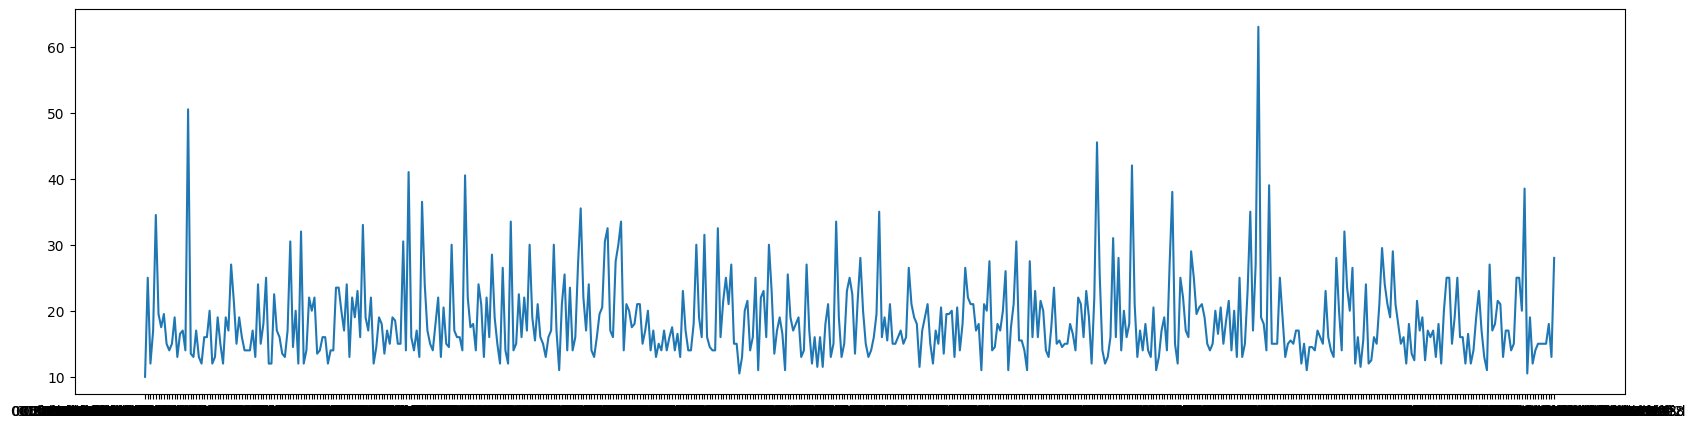

In [42]:
plt.figure(figsize=(20,5))
plt.plot(mdf_2['total_claims'])
plt.show()

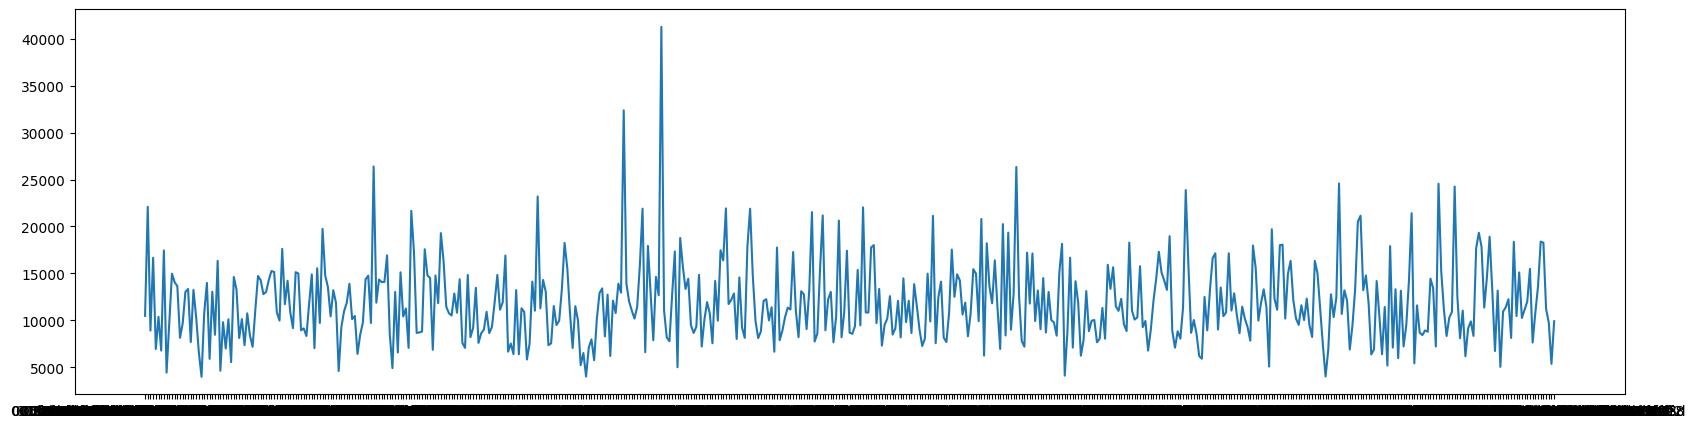

In [43]:
plt.figure(figsize=(20,5))
plt.plot(mdf_2['average_wage'])
plt.show()

In [44]:
mdf_3 = mdf_1.groupby("week_number").median()
mdf_3.head(5)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15565/1689348336.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mdf_3 = mdf_1.groupby("week_number").median()


,Unnamed: 0,timeperiod,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
week_number,,,,,,,,,,,,,,,,,,,,,
1,7603.0,20220101.0,18095.0,50251.5,19.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10992.208333
2,7786.5,20220108.0,18095.0,43052.0,24.0,0.0,0.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11040.476190
3,8836.5,20220115.0,18095.0,46752.0,21.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11026.434524
5,8290.0,20220129.0,18094.0,42952.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10951.805556
6,8593.0,20220205.0,18095.0,42901.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11040.285714


plotting average median wage vs total_claims for each unique weeks

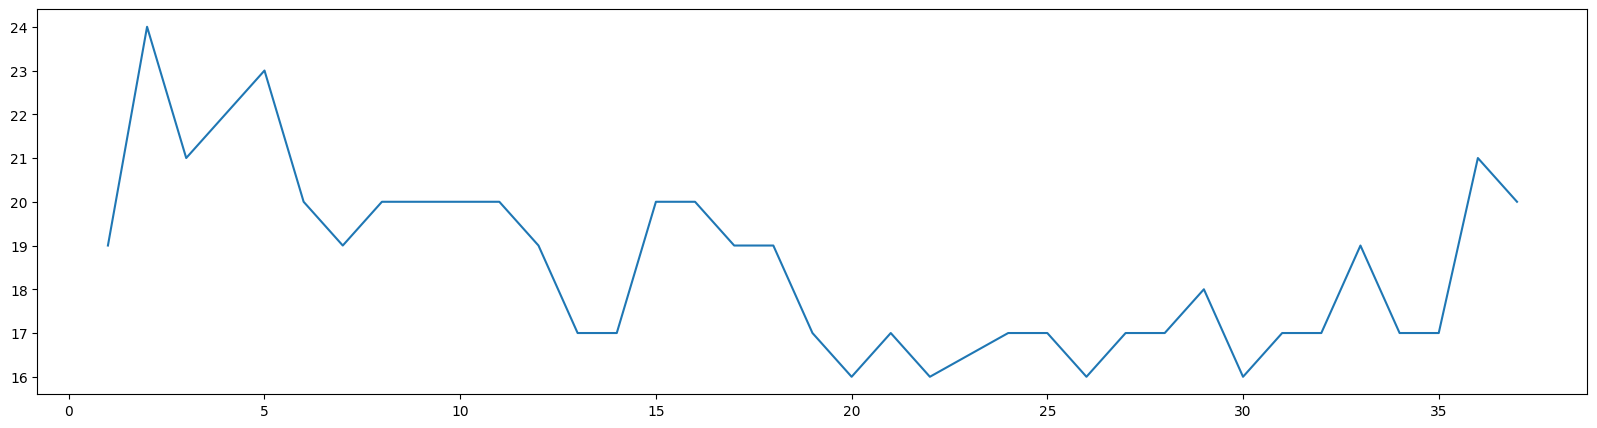

In [45]:
plt.figure(figsize=(20,5))
plt.plot(mdf_3['total_claims'])
plt.show()

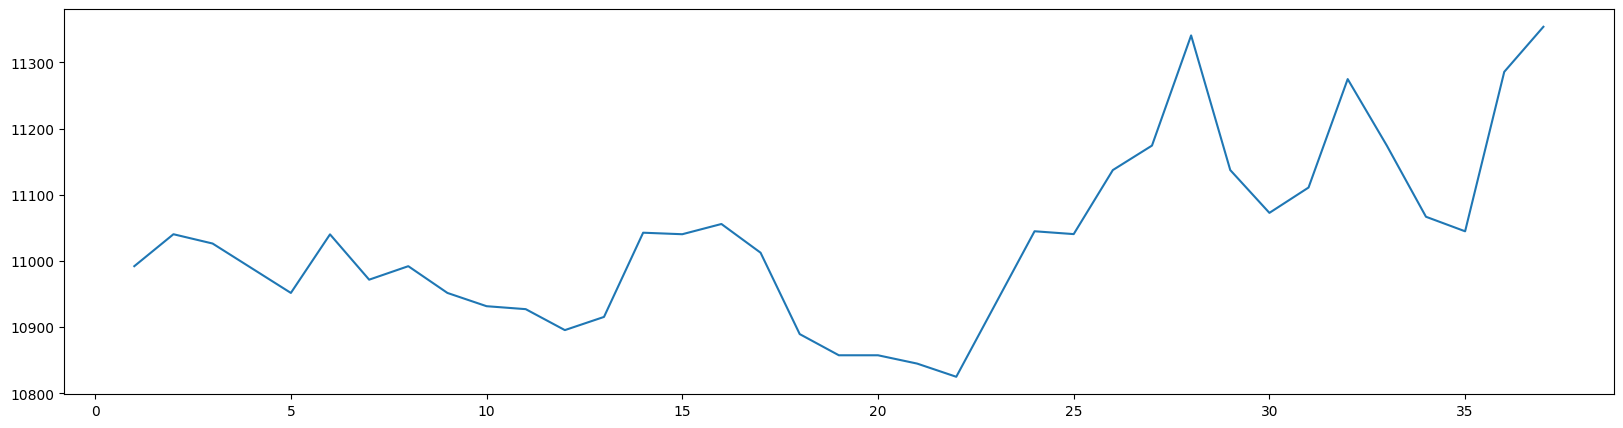

In [46]:
plt.figure(figsize=(20,5))
plt.plot(mdf_3['average_wage'])
plt.show()

In [47]:
mdf_4 = mdf_1.groupby("week_number").mean()
mdf_4.head(5)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15565/3556300845.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mdf_4 = mdf_1.groupby("week_number").mean()


,Unnamed: 0,timeperiod,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
week_number,,,,,,,,,,,,,,,,,,,,,
1,7864.991489,20220101.0,18087.965957,230264.691489,22.329787,0.0,0.489362,6.844681,2.736170,0.048936,...,4.725532,0.057447,0.000000,0.000000,3.595745,0.059574,0.0,0.153191,7.646809,11620.818959
2,8084.148594,20220108.0,18087.678715,227869.190763,26.622490,0.0,0.536145,10.299197,4.002008,0.084337,...,7.815261,0.000000,0.000000,0.000000,6.102410,0.130522,0.0,0.098394,9.536145,11689.997273
3,8594.651452,20220115.0,18088.659751,229751.705394,24.195021,0.0,0.278008,8.854772,3.286307,0.099585,...,5.983402,0.000000,0.000000,0.000000,4.748963,0.087137,0.0,0.304979,7.736515,11660.908792
5,8166.200855,20220129.0,18087.495726,215850.267094,25.057692,0.0,0.337607,9.002137,3.536325,0.051282,...,6.532051,0.000000,0.051282,0.098291,5.096154,0.079060,0.0,0.100427,8.209402,11615.620139
6,8475.881319,20220205.0,18088.503297,214906.762637,22.951648,0.0,0.263736,7.345055,3.265934,0.149451,...,5.041758,0.000000,0.000000,0.000000,3.828571,0.050549,0.0,0.323077,7.487912,11622.141373


plotting average mean wage vs total_claims for each unique weeks

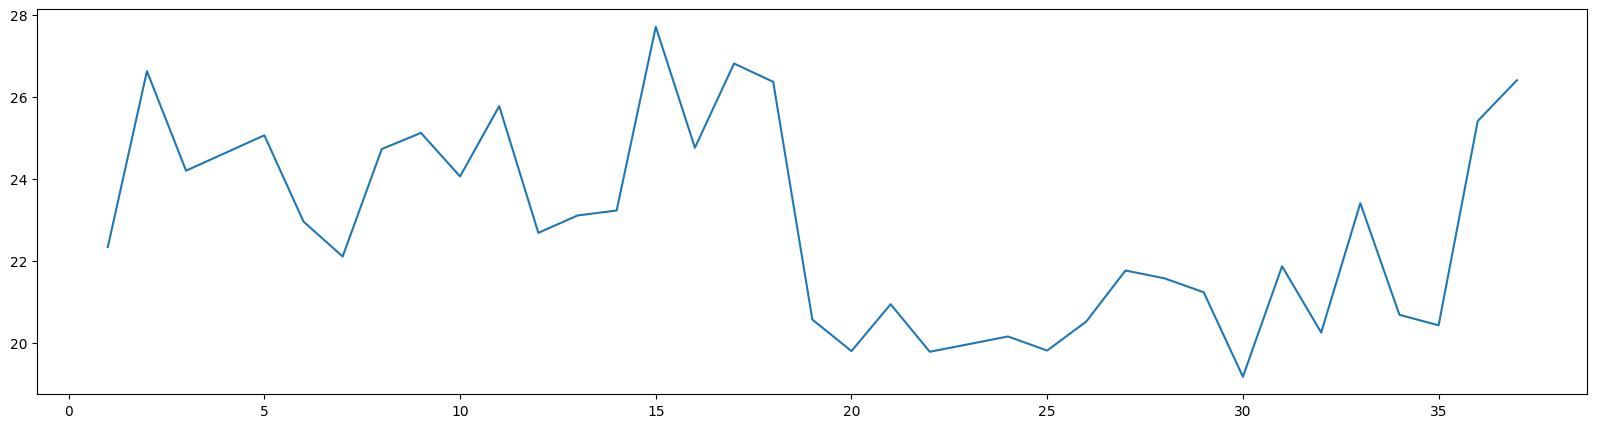

In [48]:
plt.figure(figsize=(20,5))
plt.plot(mdf_4['total_claims'])
plt.show()

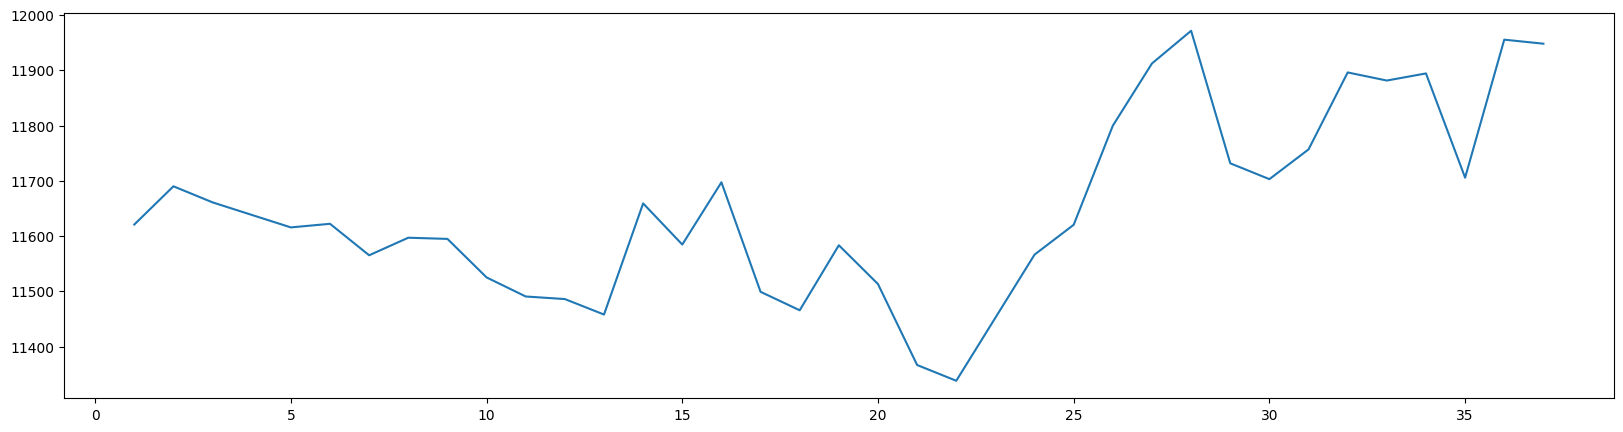

In [49]:
plt.figure(figsize=(20,5))
plt.plot(mdf_4['average_wage'])
plt.show()

In [50]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18]:
            k+=1
            u_uuid.append(row["uu_id"])

In [51]:
print(len(u_uuid))
k

524


524

In [52]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19]:
            k+=1
            u_uuid.append(row["uu_id"])

In [53]:
print(len(u_uuid))
k

524


524

In [54]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21]:
            k+=1
            u_uuid.append(row["uu_id"])

In [55]:
print(len(u_uuid))
k

524


524

In [56]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23]:
            k+=1
            u_uuid.append(row["uu_id"])

In [57]:
print(len(u_uuid))
k

524


524

In [58]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37]:
            k+=1
            u_uuid.append(row["uu_id"])

In [59]:
print(len(u_uuid))
k

423


423

In [60]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36]:
            k+=1
            u_uuid.append(row["uu_id"])

In [61]:
print(len(u_uuid))
k

479


479

In [62]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35]:
            k+=1
            u_uuid.append(row["uu_id"])

In [63]:
print(len(u_uuid))
k

495


495

In [64]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34]:
            k+=1
            u_uuid.append(row["uu_id"])

In [65]:
print(len(u_uuid))
k

503


503

In [66]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [67]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
pdf = query1_job.to_dataframe()
print(len(pdf))
pdf.head()

525


,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44


In [68]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33]:
            k+=1
            u_uuid.append(row["uu_id"])

In [69]:
print(len(u_uuid))
k

508


508

In [70]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32]:
            k+=1
            u_uuid.append(row["uu_id"])

In [71]:
print(len(u_uuid))
k

511


511

In [72]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31]:
            k+=1
            u_uuid.append(row["uu_id"])

In [73]:
print(len(u_uuid))
k

517


517

In [74]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30]:
            k+=1
            u_uuid.append(row["uu_id"])

In [75]:
print(len(u_uuid))
k

517


517

In [76]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29]:
            k+=1
            u_uuid.append(row["uu_id"])

In [77]:
print(len(u_uuid))
k

518


518

In [78]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27]:
            k+=1
            u_uuid.append(row["uu_id"])

In [79]:
print(len(u_uuid))
k

522


522

In [80]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26]:
            k+=1
            u_uuid.append(row["uu_id"])

In [81]:
print(len(u_uuid))
k

523


523

In [82]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25]:
            k+=1
            u_uuid.append(row["uu_id"])

In [83]:
print(len(u_uuid))
k

524


524

In [84]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24]:
            k+=1
            u_uuid.append(row["uu_id"])

In [85]:
print(len(u_uuid))
k

524


524

In [86]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23]:
            k+=1
            u_uuid.append(row["uu_id"])

In [87]:
print(len(u_uuid))
k

524


524

In [88]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,21]:
            k+=1
            u_uuid.append(row["uu_id"])

In [89]:
print(len(u_uuid))
k

524


524

In [90]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,21,20]:
            k+=1
            u_uuid.append(row["uu_id"])

In [91]:
print(len(u_uuid))
k

524


524

In [92]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,21,20,19]:
            k+=1
            u_uuid.append(row["uu_id"])

In [93]:
print(len(u_uuid))
k

524


524

In [94]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,21,20,19,18]:
            k+=1
            u_uuid.append(row["uu_id"])

In [95]:
print(len(u_uuid))
k

524


524

In [96]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,21,20,19,18,17]:
            k+=1
            u_uuid.append(row["uu_id"])

In [97]:
print(len(u_uuid))
k

524


524

In [98]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,21,20,19,18,17,16]:
            k+=1
            u_uuid.append(row["uu_id"])

In [99]:
print(len(u_uuid))
k

524


524

In [100]:
import os
import pandas
import pandas as pd
import numpy as np
import matplotlib
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
# import lightgbm as lgb
import statsmodels.api as sm
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

CONFIGURE THE BIGQUERY SETTINGS

In [101]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [102]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`;
"""

In [103]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
wdf = query_job.to_dataframe()
wdf.head()

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667


In [104]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data` d
LEFT JOIN `ironhacks-data.ironhacks_competition.wage_data` i
ON d.uu_id = i.uu_id;
"""

In [105]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
Mdf = query1_job.to_dataframe()
Mdf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,uu_id_1,countyfips_1,tract_1,tract_name_1,average_wage
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,11,0,0,<NA>,<NA>,f013068de98db1470bd986137a0c6d23,18003,900,"Census Tract 9, Allen County, Indiana",8347.125000
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,<NA>,<NA>,0,0,0,21957d5517323845818d87623589e1ba,18089,10400,"Census Tract 104, Lake County, Indiana",7036.636364
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,39,0,0,0,0,6a5609f385912113b6f1014b958ed748,18089,11500,"Census Tract 115, Lake County, Indiana",7890.142857
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,10,0,0,<NA>,<NA>,46b2882ec4c373527ec33f7bd4f1388d,18089,20700,"Census Tract 207, Lake County, Indiana",7534.375000
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,135,<NA>,<NA>,<NA>,<NA>,37495d17e82f7df326bfc2c4c090f7b7,18089,21900,"Census Tract 219, Lake County, Indiana",11825.125000


In [106]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [107]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
pdf = query1_job.to_dataframe()
print(len(pdf))
pdf.head()

525


,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44


In [108]:
query1 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [109]:
# QUERY THE DATA ONCE
query1_job = bigquery_client.query(query1)
udf = query1_job.to_dataframe()
udf.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [110]:
# saving data to avoid pulling it each time from the server
wdf.to_csv("wage.csv")
udf.to_csv("unemploy.csv")
Mdf.to_csv("mixed.csv")
pdf.to_csv("pred.csv")

In [111]:
# reading from the saved data
udf = pd.read_csv("unemploy.csv")
wdf = pd.read_csv("wage.csv")
Mdf = pd.read_csv("mixed.csv")
pdf = pd.read_csv("pred.csv")

In [112]:
print(udf["week_number"].unique())
print(Mdf["week_number"].unique())
print(pdf["week_number"].unique())
# udf.nunique()

[16 12 13 29 15 34  5 24 19 28 37 36 27 26 21 20 22  9  3 32 11 14 17  6
 35  7 31  1 10 30 33  2 18  8 25]
[16 12 13 29 15 34  5 24 19 28 37 36 27 26 21 20 22  9  3 32 11 14 17  6
 35  7 31  1 10 30 33  2 18  8 25]
[44]


In [113]:
# cleaning the data by imputing null and nan with 0
mdf = Mdf.replace(np.nan, 0)
udf = udf.replace(np.nan, 0)

In [114]:
# understanding the datatypes for each columns of the dataframe
mdf.dtypes

Unnamed: 0                  int64
uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
tract_name                 object
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
uu_id_1                    object
countyfips_1                int64
tract_1                     int64
tract_name_1  

In [115]:
# removing unwanted columns
mdf_1 = mdf.drop(["uu_id_1","countyfips_1","tract_1","tract_name_1","tract_name"],axis = 1)
mdf_1.columns

Index(['Unnamed: 0', 'uu_id', 'timeperiod', 'week_number', 'countyfips',
       'tract', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')

In [116]:
# there was a N/A value left that we caught while imputing and converting values to float
mdf_1["top_category_employer1"].unique()

array(['31-33', '48-49', '56', '72', '23', '54', '61', '11', '62',
       '44-45', '81', '52', '42', '71', '92', '51', '53', '55', '21',
       '99', '22'], dtype=object)

In [117]:
# imputing and converting values to float
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf_1[emp_cols] = mdf_1[emp_cols].replace('31-33', "31.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('48-49', "48.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('44-45', "44.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('N/A', "0.0")

In [118]:
mdf_1["top_category_employer1"] = pd.to_numeric(mdf_1["top_category_employer1"])
mdf_1["top_category_employer2"] = pd.to_numeric(mdf_1["top_category_employer2"])
mdf_1["top_category_employer3"] = pd.to_numeric(mdf_1["top_category_employer3"])

In [119]:
mdf_1.dtypes

Unnamed: 0                  int64
uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1    float64
top_category_employer2    float64
top_category_employer3    float64
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
average_wage              float64
dtype: object

In [120]:
mdf_1.describe()

,Unnamed: 0,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
count,16833.000000,1.683300e+04,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,...,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.0,16833.000000,16833.000000,16833.000000
mean,8416.000000,2.022054e+07,21.329531,18088.919682,211605.900315,22.952712,0.041644,0.455771,6.927642,3.263471,...,4.597992,0.005228,0.009921,0.012475,4.544526,0.124161,0.0,0.241965,6.574170,11695.354680
std,4859.412876,2.683668e+02,11.618554,41.019467,288715.024920,14.583655,0.953462,3.220428,11.931776,8.212340,...,10.175552,0.441002,0.469947,0.535979,11.640663,1.947116,0.0,2.336547,11.040787,4123.648325
min,0.000000,2.022010e+07,1.000000,18001.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3992.500000
25%,4208.000000,2.022031e+07,11.000000,18063.000000,10100.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8807.166667
50%,8416.000000,2.022053e+07,22.000000,18095.000000,42801.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11045.000000
75%,12624.000000,2.022081e+07,32.000000,18103.000000,342600.000000,27.000000,0.000000,0.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,13908.333333
max,16832.000000,2.022091e+07,37.000000,18183.000000,976400.000000,170.000000,41.000000,78.000000,137.000000,154.000000,...,139.000000,49.000000,36.000000,41.000000,163.000000,110.000000,0.0,74.000000,155.000000,41267.000000


In [121]:
mdf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              16833 non-null  int64  
 1   uu_id                   16833 non-null  object 
 2   timeperiod              16833 non-null  int64  
 3   week_number             16833 non-null  int64  
 4   countyfips              16833 non-null  int64  
 5   tract                   16833 non-null  int64  
 6   total_claims            16833 non-null  int64  
 7   edu_8th_or_less         16833 non-null  float64
 8   edu_grades_9_11         16833 non-null  float64
 9   edu_hs_grad_equiv       16833 non-null  float64
 10  edu_post_hs             16833 non-null  float64
 11  edu_unknown             16833 non-null  float64
 12  top_category_employer1  16833 non-null  float64
 13  top_category_employer2  16833 non-null  float64
 14  top_category_employer3  16833 non-null

In [122]:
mdf_2 = mdf_1.groupby("uu_id").median()
mdf_2.head(5)

,Unnamed: 0,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
uu_id,,,,,,,,,,,,,,,,,,,,,
001cd9ae23064d7f0fd3cd327c873d8d,1876.0,20220827.0,35.0,18099.0,20102.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10484.333333
005be9532fd717dc36d4be318fd9ad25,10901.5,20220705.5,27.5,18039.0,802.0,25.0,0.0,0.0,10.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,22092.027027
007c1caccff1fbb3a0b8a10790f77141,8596.0,20220507.0,19.0,18081.0,610900.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,8909.444444
009683350b175edfc6414d664e4ba873,5263.0,20220409.0,15.0,18089.0,42801.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16658.000000
00f962ce727b8dbbf20925abd5a253dd,8025.5,20220569.5,23.0,18097.0,330900.0,34.5,0.0,0.0,16.0,0.0,...,14.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,6953.882353


plotting average median wage vs total_claims for each unique uu_ids

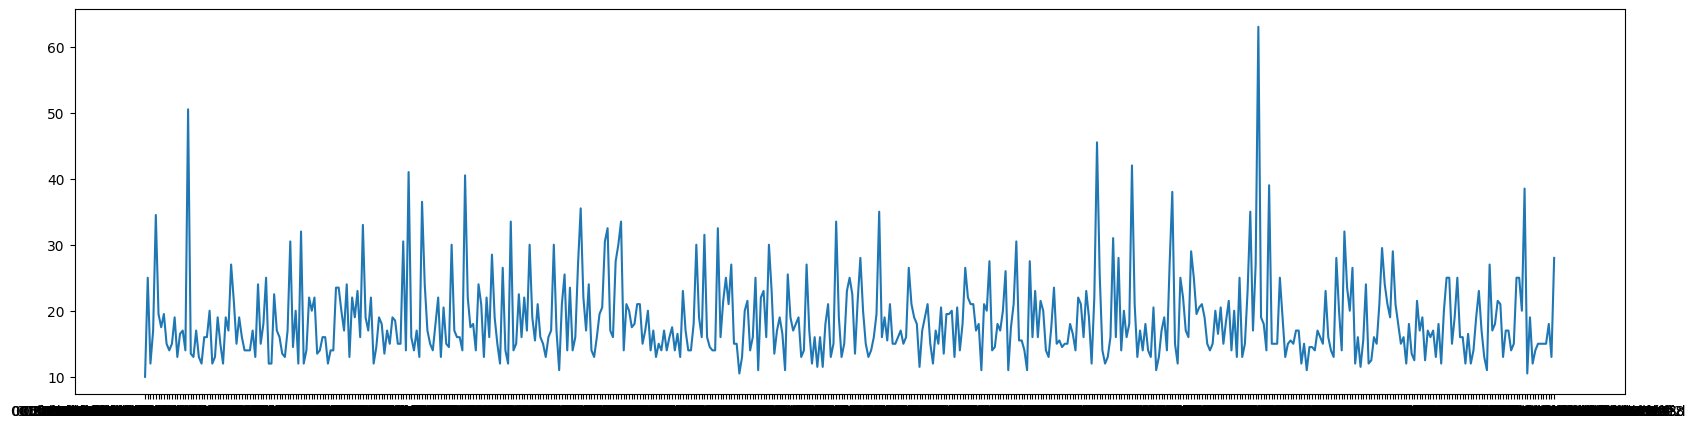

In [123]:
plt.figure(figsize=(20,5))
plt.plot(mdf_2['total_claims'])
plt.show()

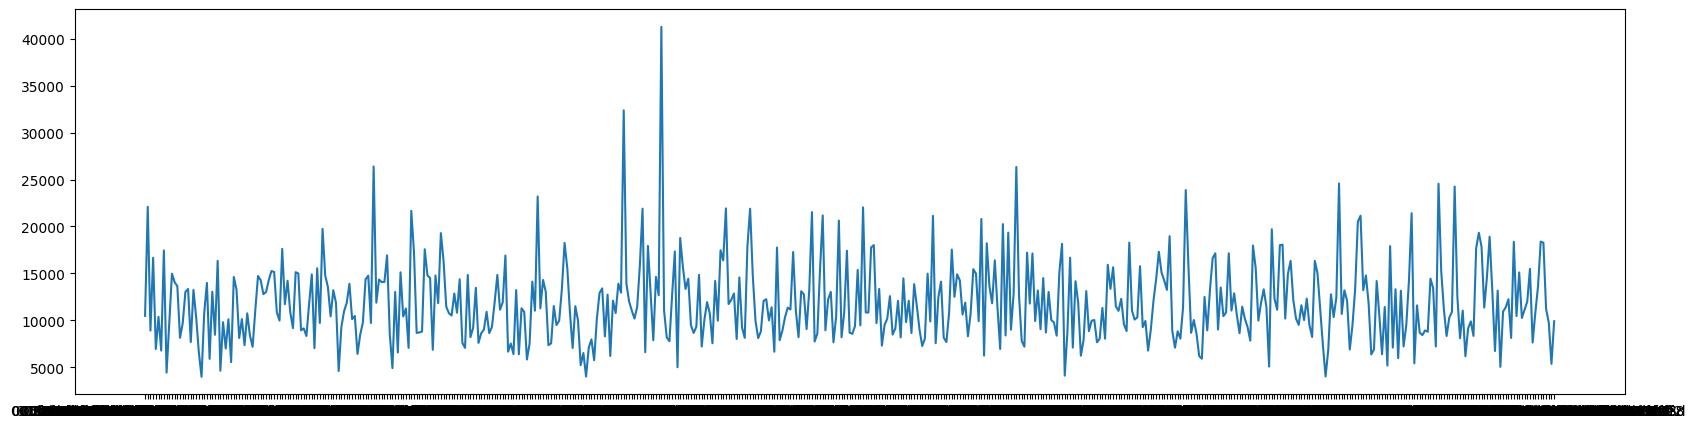

In [124]:
plt.figure(figsize=(20,5))
plt.plot(mdf_2['average_wage'])
plt.show()

In [125]:
mdf_3 = mdf_1.groupby("week_number").median()
mdf_3.head(5)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15565/1689348336.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mdf_3 = mdf_1.groupby("week_number").median()


,Unnamed: 0,timeperiod,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
week_number,,,,,,,,,,,,,,,,,,,,,
1,7603.0,20220101.0,18095.0,50251.5,19.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10992.208333
2,7786.5,20220108.0,18095.0,43052.0,24.0,0.0,0.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11040.476190
3,8836.5,20220115.0,18095.0,46752.0,21.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11026.434524
5,8290.0,20220129.0,18094.0,42952.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10951.805556
6,8593.0,20220205.0,18095.0,42901.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11040.285714


plotting average median wage vs total_claims for each unique weeks

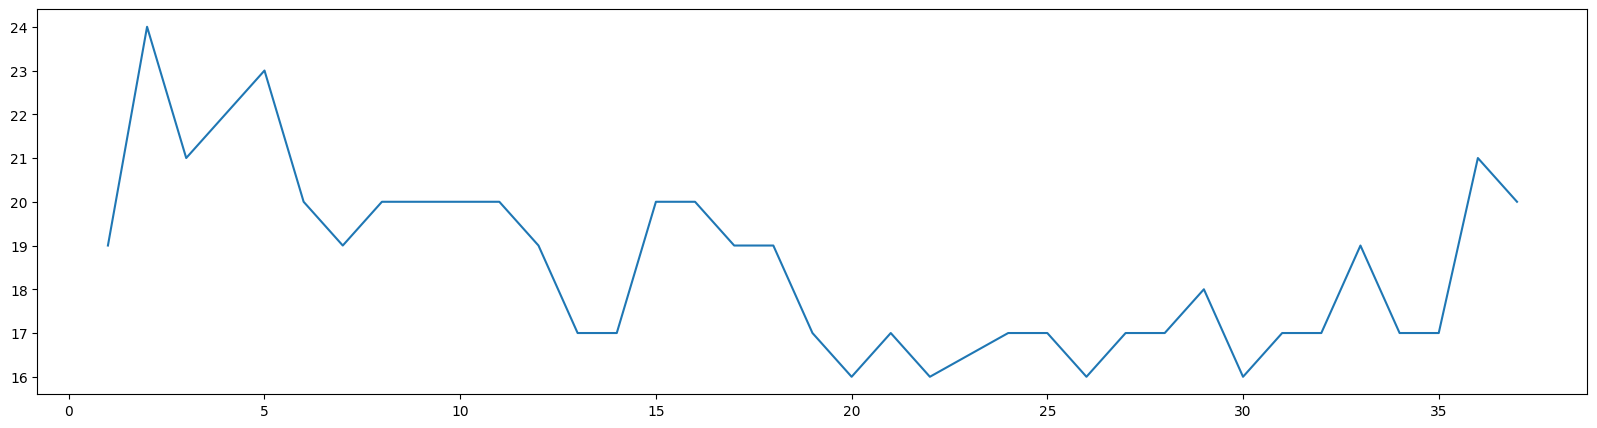

In [126]:
plt.figure(figsize=(20,5))
plt.plot(mdf_3['total_claims'])
plt.show()

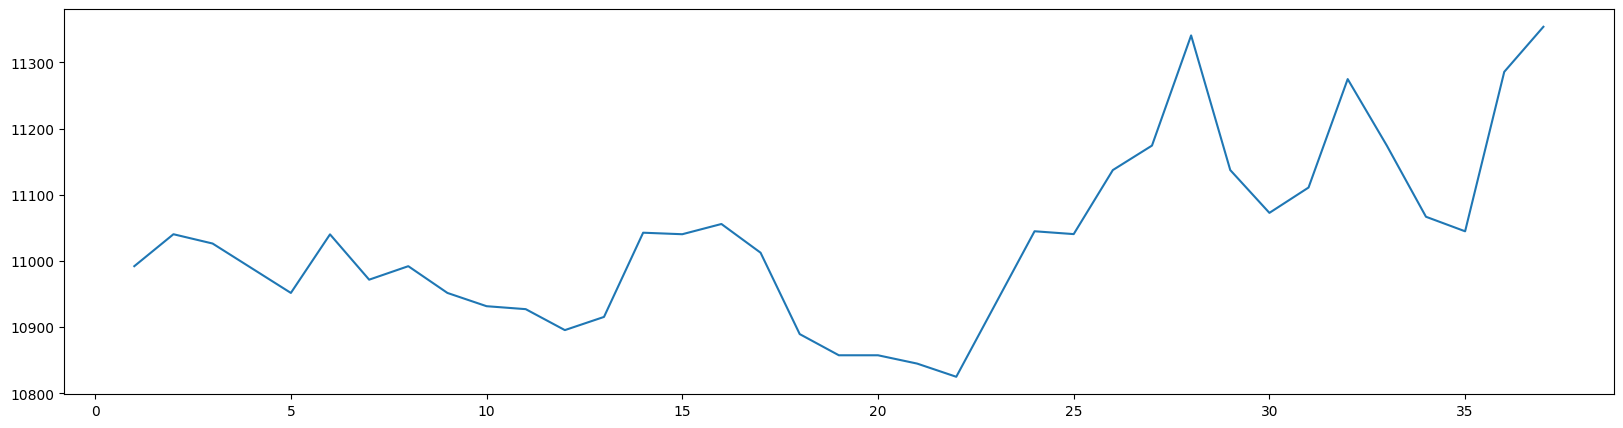

In [127]:
plt.figure(figsize=(20,5))
plt.plot(mdf_3['average_wage'])
plt.show()

In [128]:
mdf_4 = mdf_1.groupby("week_number").mean()
mdf_4.head(5)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15565/3556300845.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mdf_4 = mdf_1.groupby("week_number").mean()


,Unnamed: 0,timeperiod,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
week_number,,,,,,,,,,,,,,,,,,,,,
1,7864.991489,20220101.0,18087.965957,230264.691489,22.329787,0.0,0.489362,6.844681,2.736170,0.048936,...,4.725532,0.057447,0.000000,0.000000,3.595745,0.059574,0.0,0.153191,7.646809,11620.818959
2,8084.148594,20220108.0,18087.678715,227869.190763,26.622490,0.0,0.536145,10.299197,4.002008,0.084337,...,7.815261,0.000000,0.000000,0.000000,6.102410,0.130522,0.0,0.098394,9.536145,11689.997273
3,8594.651452,20220115.0,18088.659751,229751.705394,24.195021,0.0,0.278008,8.854772,3.286307,0.099585,...,5.983402,0.000000,0.000000,0.000000,4.748963,0.087137,0.0,0.304979,7.736515,11660.908792
5,8166.200855,20220129.0,18087.495726,215850.267094,25.057692,0.0,0.337607,9.002137,3.536325,0.051282,...,6.532051,0.000000,0.051282,0.098291,5.096154,0.079060,0.0,0.100427,8.209402,11615.620139
6,8475.881319,20220205.0,18088.503297,214906.762637,22.951648,0.0,0.263736,7.345055,3.265934,0.149451,...,5.041758,0.000000,0.000000,0.000000,3.828571,0.050549,0.0,0.323077,7.487912,11622.141373


plotting average mean wage vs total_claims for each unique weeks

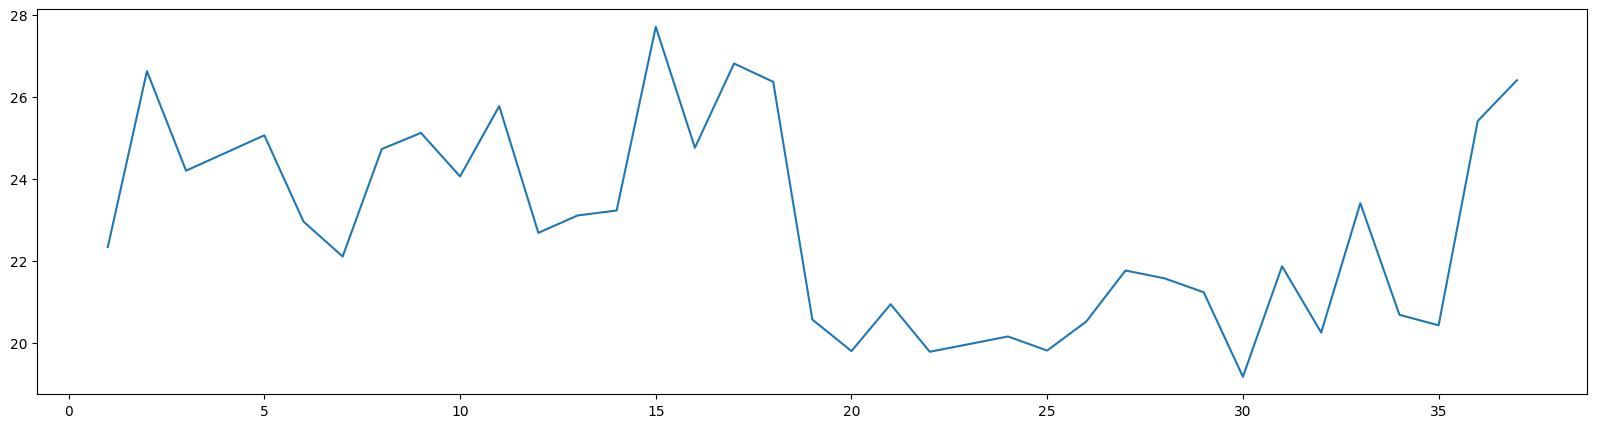

In [129]:
plt.figure(figsize=(20,5))
plt.plot(mdf_4['total_claims'])
plt.show()

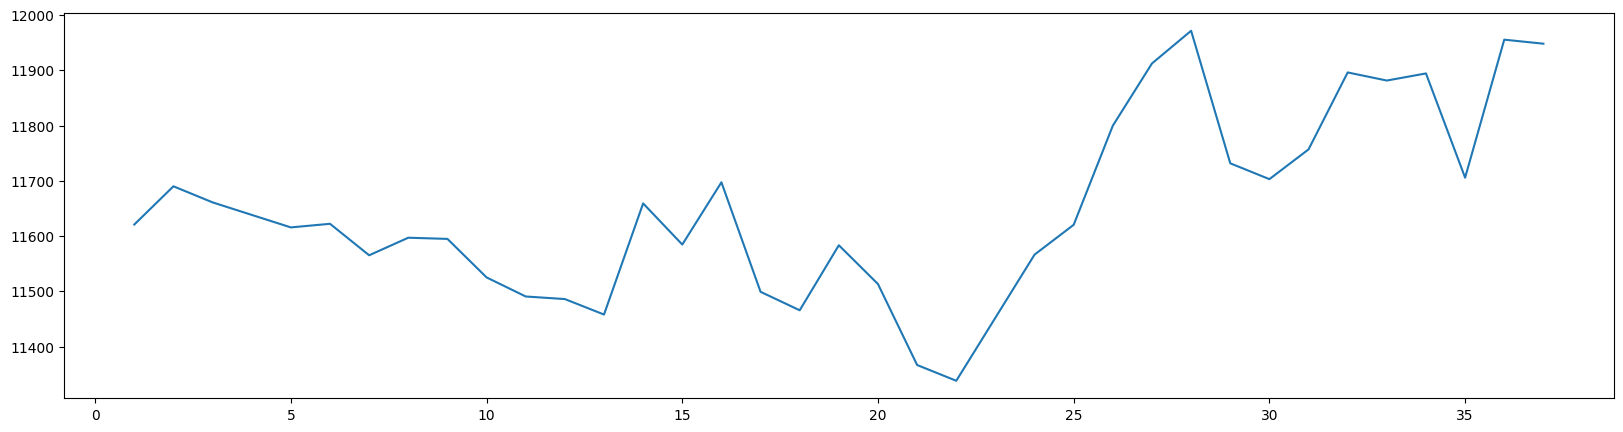

In [130]:
plt.figure(figsize=(20,5))
plt.plot(mdf_4['average_wage'])
plt.show()

In [131]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,21,20,19,18,17,16]:
            k+=1
            u_uuid.append(row["uu_id"])

In [132]:
print(len(u_uuid))
k

524


524

In [133]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26]:
            k+=1
            u_uuid.append(row["uu_id"])

In [134]:
print(len(u_uuid))
k

523


523

In [135]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25]:
            k+=1
            u_uuid.append(row["uu_id"])

In [136]:
print(len(u_uuid))
k

524


524

In [137]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [38,37,36,35,34,33,32,31,30,29,28,27,26,25]:
            k+=1
            u_uuid.append(row["uu_id"])

In [138]:
print(len(u_uuid))
k

524


524

In [139]:
# finding the uuids that do not have week 37
mdf_5 = mdf_1.groupby(['uu_id'], sort=False)['week_number'].max()
u_1uid = []

In [140]:
for row in mdf_5.index:
    if mdf_5[row] != 37:
        u_1uid.append(row)

In [141]:
print(len(u_1uid))
len(u_1uid)

102


102

imputing the 0 values and getting the prediction features ready

In [142]:
arr = [0]*93
arr_week = [37]*93
dct = {}
coll = mdf_1.columns

In [143]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr

merging with the primary dataframe

In [144]:
mdf_6 = pd.DataFrame(dct)
mdf_6 = mdf_6.append(mdf_1, ignore_index = True)
len(mdf_6)

ValueError: All arrays must be of the same length

imputing the 0 values and getting the prediction features ready

In [145]:
arr = [0]*93
arr_week = [37]*93
dct = {}
coll = mdf_1.columns

In [146]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr
dct

{'Unnamed: 0': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'uu_id': ['f013068de98db1470bd986137a0c6d23',
  '6a5609f385912113b6f1014b958ed748',
  '45c8cf419dd4c4b442dbf3603ba94379',
  '050a624d618a68e43fe31189909c644f',
  '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
  'c06321bd819be6f5c537c67a2797bd12',
  'cfeb7a55105a6e277ebef7dc3df83ffc',
  'd7fccf988f1d2e7ec1a105f974835ef8',
  '7ee27423441d3bced123afcec6335da8',
  '3611ab4b321d4532f1f18b13d1fd3b93',
  '9ee08e65a6fc00045b2c609903e65603',
  '20db450280ec6846d7a829a6ba40ccac',
  '0e6523fb3fc17f6a2ac7050972bd4bfd',
  '1fe978b588e127

imputing the 0 values and getting the prediction features ready

In [147]:
arr = [0]*93
arr_week = [37]*93
dct = {}
coll = mdf_1.columns

In [148]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr
dct

{'Unnamed: 0': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'uu_id': ['f013068de98db1470bd986137a0c6d23',
  '6a5609f385912113b6f1014b958ed748',
  '45c8cf419dd4c4b442dbf3603ba94379',
  '050a624d618a68e43fe31189909c644f',
  '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
  'c06321bd819be6f5c537c67a2797bd12',
  'cfeb7a55105a6e277ebef7dc3df83ffc',
  'd7fccf988f1d2e7ec1a105f974835ef8',
  '7ee27423441d3bced123afcec6335da8',
  '3611ab4b321d4532f1f18b13d1fd3b93',
  '9ee08e65a6fc00045b2c609903e65603',
  '20db450280ec6846d7a829a6ba40ccac',
  '0e6523fb3fc17f6a2ac7050972bd4bfd',
  '1fe978b588e127

imputing the 0 values and getting the prediction features ready

In [149]:
arr = [0]*93
arr_week = [37]*93
dct = {}
coll = mdf_1.columns

In [150]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr
dct.keys

<function dict.keys>

imputing the 0 values and getting the prediction features ready

In [151]:
arr = [0]*93
arr_week = [37]*93
dct = {}
coll = mdf_1.columns

In [152]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr
dct.keys()

dict_keys(['Unnamed: 0', 'uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3', 'gender_female', 'gender_male', 'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer', 'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'])

In [153]:
# understanding the datatypes for each columns of the dataframe
mdf.drop("Unnamed: 0", axis =1)
mdf.dtypes

Unnamed: 0                  int64
uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
tract_name                 object
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
uu_id_1                    object
countyfips_1                int64
tract_1                     int64
tract_name_1  

In [154]:
# understanding the datatypes for each columns of the dataframe
mdf.drop("Unnamed: 0", axis =0)
mdf.dtypes

KeyError: "['Unnamed: 0'] not found in axis"

In [155]:
# understanding the datatypes for each columns of the dataframe
mdf = mdf.drop("Unnamed: 0", axis =1)
mdf.dtypes

uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
tract_name                 object
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
uu_id_1                    object
countyfips_1                int64
tract_1                     int64
tract_name_1               object
average_wage  

In [156]:
# removing unwanted columns
mdf_1 = mdf.drop(["uu_id_1","countyfips_1","tract_1","tract_name_1","tract_name"],axis = 1)
mdf_1.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')

In [157]:
# there was a N/A value left that we caught while imputing and converting values to float
mdf_1["top_category_employer1"].unique()

array(['31-33', '48-49', '56', '72', '23', '54', '61', '11', '62',
       '44-45', '81', '52', '42', '71', '92', '51', '53', '55', '21',
       '99', '22'], dtype=object)

In [158]:
# imputing and converting values to float
emp_cols = ["top_category_employer1", "top_category_employer2" ,"top_category_employer3"]
mdf_1[emp_cols] = mdf_1[emp_cols].replace('31-33', "31.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('48-49', "48.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('44-45', "44.5")
mdf_1[emp_cols] = mdf_1[emp_cols].replace('N/A', "0.0")

In [159]:
mdf_1["top_category_employer1"] = pd.to_numeric(mdf_1["top_category_employer1"])
mdf_1["top_category_employer2"] = pd.to_numeric(mdf_1["top_category_employer2"])
mdf_1["top_category_employer3"] = pd.to_numeric(mdf_1["top_category_employer3"])

In [160]:
mdf_1.dtypes

uu_id                      object
timeperiod                  int64
week_number                 int64
countyfips                  int64
tract                       int64
total_claims                int64
edu_8th_or_less           float64
edu_grades_9_11           float64
edu_hs_grad_equiv         float64
edu_post_hs               float64
edu_unknown               float64
top_category_employer1    float64
top_category_employer2    float64
top_category_employer3    float64
gender_female             float64
gender_male               float64
gender_na                 float64
race_amerindian           float64
race_asian                float64
race_black                float64
race_noanswer             float64
race_hawaiiannative       float64
race_other                float64
race_white                float64
average_wage              float64
dtype: object

In [161]:
mdf_1.describe()

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
count,1.683300e+04,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,...,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.0,16833.000000,16833.000000,16833.000000
mean,2.022054e+07,21.329531,18088.919682,211605.900315,22.952712,0.041644,0.455771,6.927642,3.263471,0.094339,...,4.597992,0.005228,0.009921,0.012475,4.544526,0.124161,0.0,0.241965,6.574170,11695.354680
std,2.683668e+02,11.618554,41.019467,288715.024920,14.583655,0.953462,3.220428,11.931776,8.212340,1.499568,...,10.175552,0.441002,0.469947,0.535979,11.640663,1.947116,0.0,2.336547,11.040787,4123.648325
min,2.022010e+07,1.000000,18001.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3992.500000
25%,2.022031e+07,11.000000,18063.000000,10100.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8807.166667
50%,2.022053e+07,22.000000,18095.000000,42801.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,11045.000000
75%,2.022081e+07,32.000000,18103.000000,342600.000000,27.000000,0.000000,0.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,13908.333333
max,2.022091e+07,37.000000,18183.000000,976400.000000,170.000000,41.000000,78.000000,137.000000,154.000000,60.000000,...,139.000000,49.000000,36.000000,41.000000,163.000000,110.000000,0.0,74.000000,155.000000,41267.000000


In [162]:
mdf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uu_id                   16833 non-null  object 
 1   timeperiod              16833 non-null  int64  
 2   week_number             16833 non-null  int64  
 3   countyfips              16833 non-null  int64  
 4   tract                   16833 non-null  int64  
 5   total_claims            16833 non-null  int64  
 6   edu_8th_or_less         16833 non-null  float64
 7   edu_grades_9_11         16833 non-null  float64
 8   edu_hs_grad_equiv       16833 non-null  float64
 9   edu_post_hs             16833 non-null  float64
 10  edu_unknown             16833 non-null  float64
 11  top_category_employer1  16833 non-null  float64
 12  top_category_employer2  16833 non-null  float64
 13  top_category_employer3  16833 non-null  float64
 14  gender_female           16833 non-null

In [163]:
mdf_2 = mdf_1.groupby("uu_id").median()
mdf_2.head(5)

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
uu_id,,,,,,,,,,,,,,,,,,,,,
001cd9ae23064d7f0fd3cd327c873d8d,20220827.0,35.0,18099.0,20102.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10484.333333
005be9532fd717dc36d4be318fd9ad25,20220705.5,27.5,18039.0,802.0,25.0,0.0,0.0,10.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,22092.027027
007c1caccff1fbb3a0b8a10790f77141,20220507.0,19.0,18081.0,610900.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,8909.444444
009683350b175edfc6414d664e4ba873,20220409.0,15.0,18089.0,42801.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16658.000000
00f962ce727b8dbbf20925abd5a253dd,20220569.5,23.0,18097.0,330900.0,34.5,0.0,0.0,16.0,0.0,0.0,...,14.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,6953.882353


plotting average median wage vs total_claims for each unique uu_ids

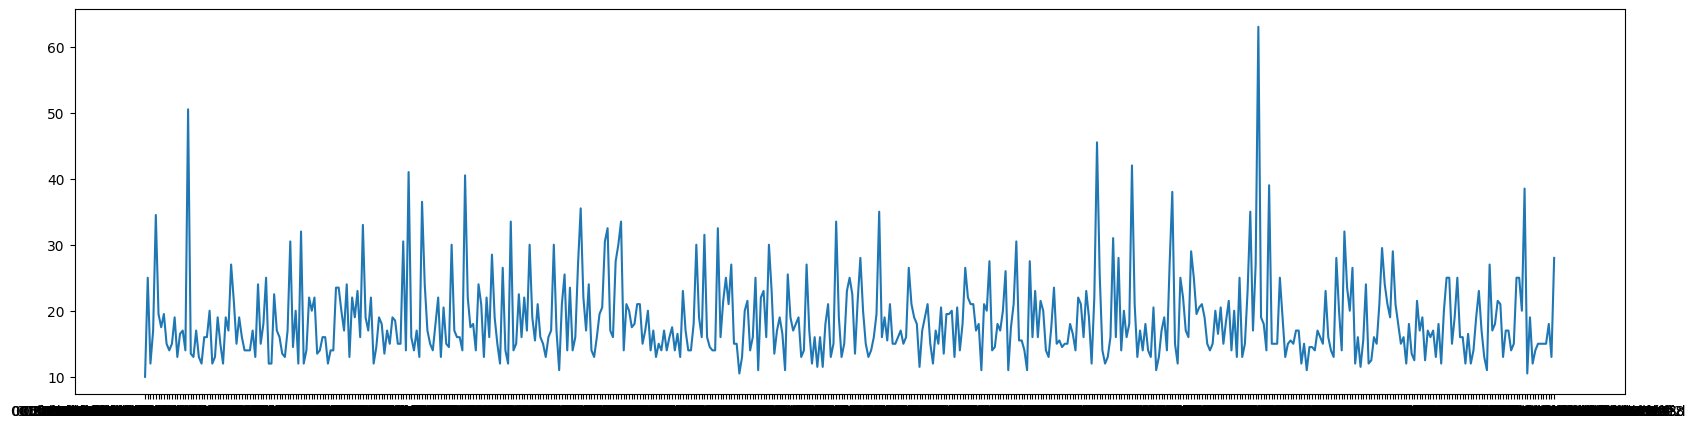

In [164]:
plt.figure(figsize=(20,5))
plt.plot(mdf_2['total_claims'])
plt.show()

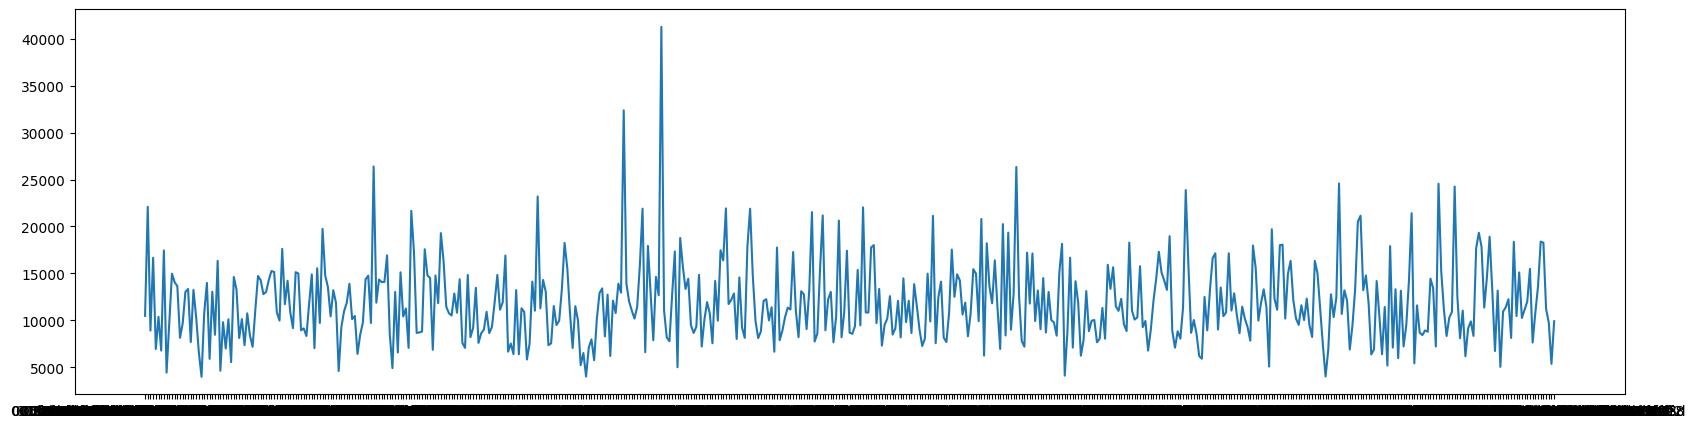

In [165]:
plt.figure(figsize=(20,5))
plt.plot(mdf_2['average_wage'])
plt.show()

In [166]:
mdf_3 = mdf_1.groupby("week_number").median()
mdf_3.head(5)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15565/1689348336.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mdf_3 = mdf_1.groupby("week_number").median()


,timeperiod,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,top_category_employer1,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
week_number,,,,,,,,,,,,,,,,,,,,,
1,20220101.0,18095.0,50251.5,19.0,0.0,0.0,0.0,0.0,0.0,31.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10992.208333
2,20220108.0,18095.0,43052.0,24.0,0.0,0.0,11.0,0.0,0.0,31.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11040.476190
3,20220115.0,18095.0,46752.0,21.0,0.0,0.0,5.0,0.0,0.0,31.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11026.434524
5,20220129.0,18094.0,42952.0,23.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10951.805556
6,20220205.0,18095.0,42901.0,20.0,0.0,0.0,0.0,0.0,0.0,31.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11040.285714


plotting average median wage vs total_claims for each unique weeks

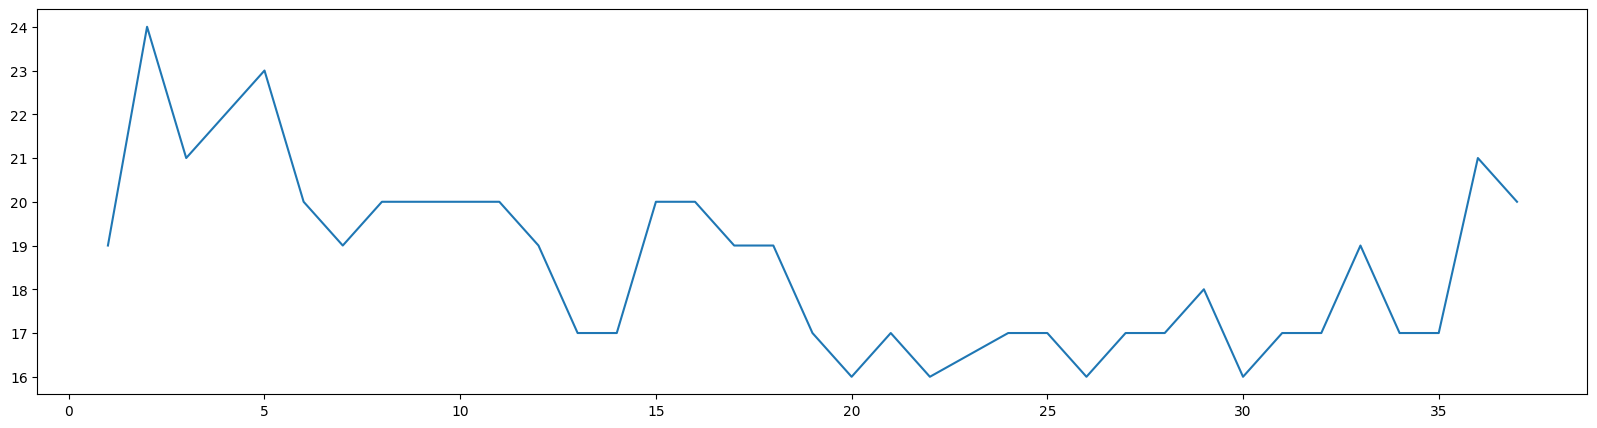

In [167]:
plt.figure(figsize=(20,5))
plt.plot(mdf_3['total_claims'])
plt.show()

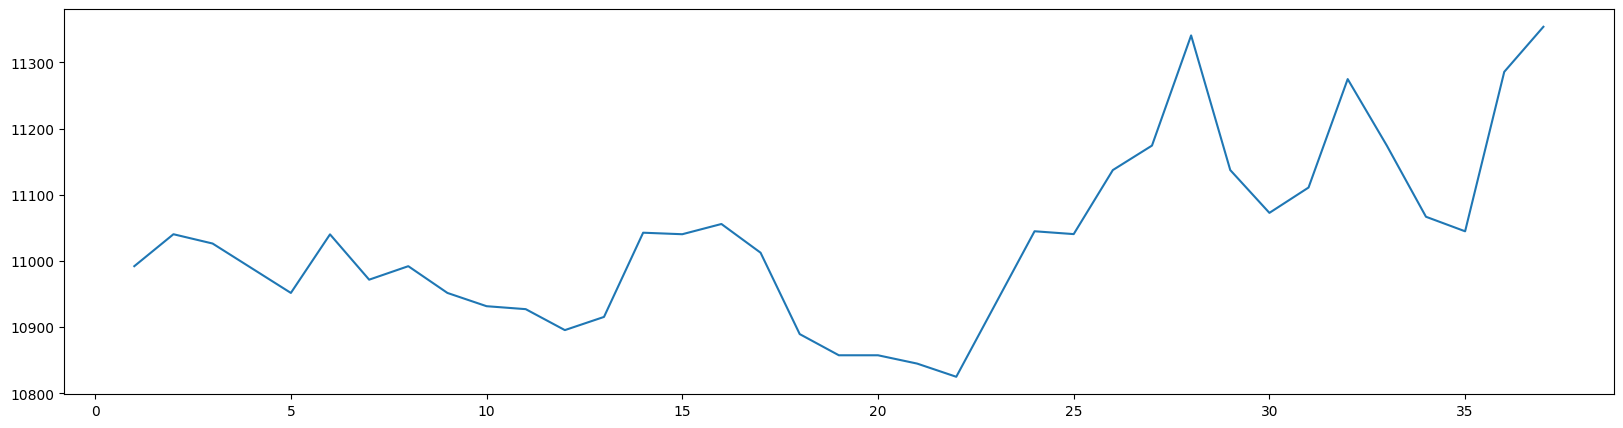

In [168]:
plt.figure(figsize=(20,5))
plt.plot(mdf_3['average_wage'])
plt.show()

In [169]:
mdf_4 = mdf_1.groupby("week_number").mean()
mdf_4.head(5)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15565/3556300845.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mdf_4 = mdf_1.groupby("week_number").mean()


,timeperiod,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,top_category_employer1,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
week_number,,,,,,,,,,,,,,,,,,,,,
1,20220101.0,18087.965957,230264.691489,22.329787,0.0,0.489362,6.844681,2.736170,0.048936,40.574468,...,4.725532,0.057447,0.000000,0.000000,3.595745,0.059574,0.0,0.153191,7.646809,11620.818959
2,20220108.0,18087.678715,227869.190763,26.622490,0.0,0.536145,10.299197,4.002008,0.084337,41.993976,...,7.815261,0.000000,0.000000,0.000000,6.102410,0.130522,0.0,0.098394,9.536145,11689.997273
3,20220115.0,18088.659751,229751.705394,24.195021,0.0,0.278008,8.854772,3.286307,0.099585,41.149378,...,5.983402,0.000000,0.000000,0.000000,4.748963,0.087137,0.0,0.304979,7.736515,11660.908792
5,20220129.0,18087.495726,215850.267094,25.057692,0.0,0.337607,9.002137,3.536325,0.051282,41.759615,...,6.532051,0.000000,0.051282,0.098291,5.096154,0.079060,0.0,0.100427,8.209402,11615.620139
6,20220205.0,18088.503297,214906.762637,22.951648,0.0,0.263736,7.345055,3.265934,0.149451,39.375824,...,5.041758,0.000000,0.000000,0.000000,3.828571,0.050549,0.0,0.323077,7.487912,11622.141373


plotting average mean wage vs total_claims for each unique weeks

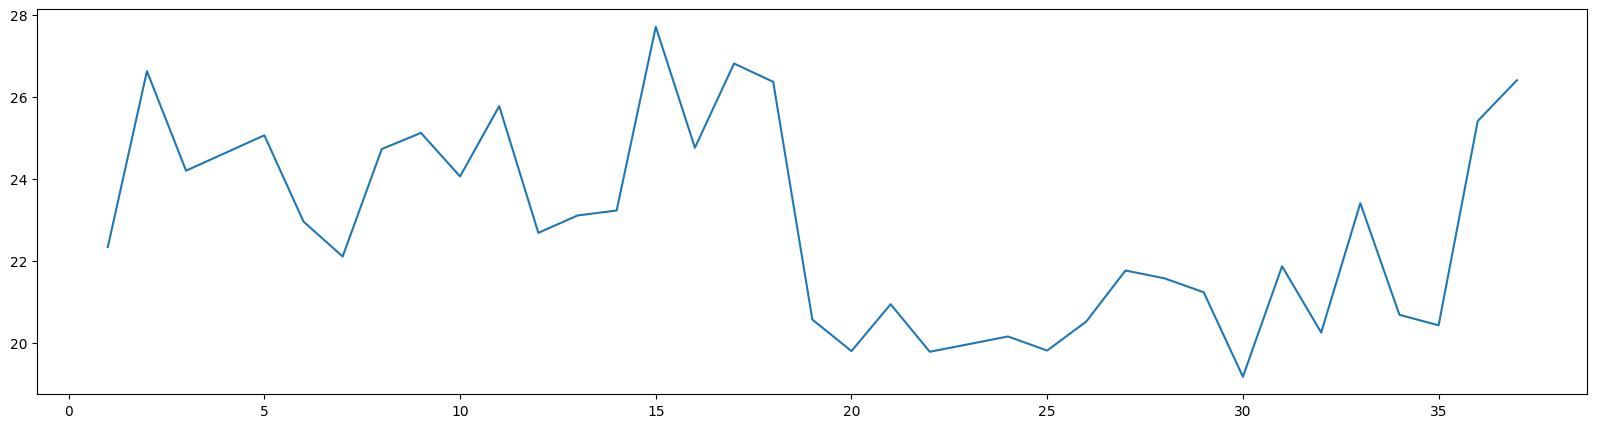

In [170]:
plt.figure(figsize=(20,5))
plt.plot(mdf_4['total_claims'])
plt.show()

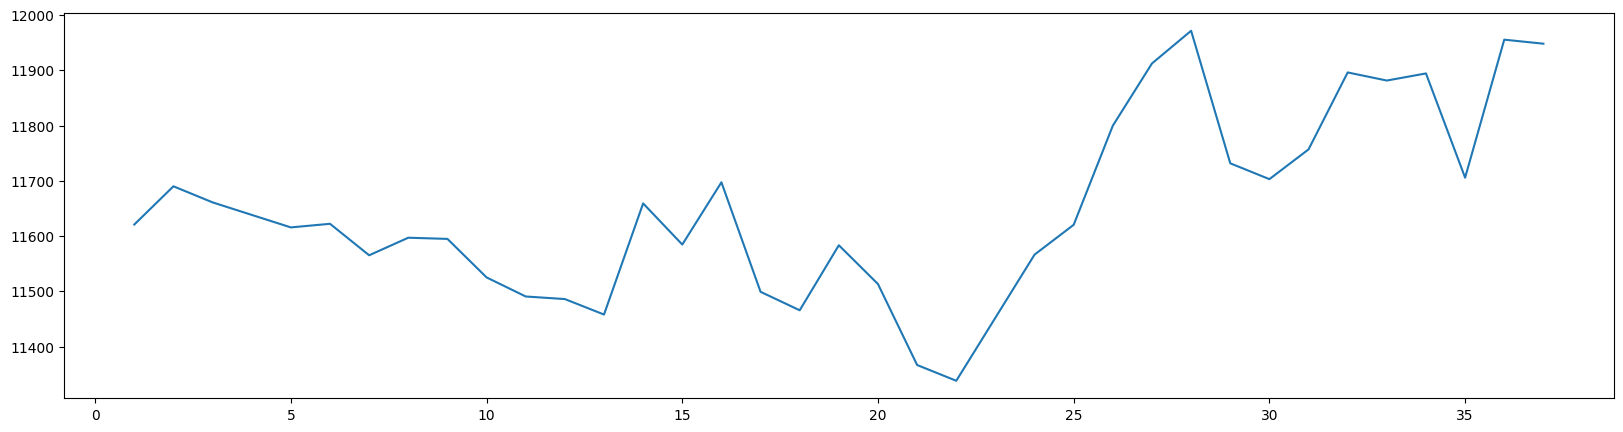

In [171]:
plt.figure(figsize=(20,5))
plt.plot(mdf_4['average_wage'])
plt.show()

In [172]:
k = 0
u_uuid = []
for i, row in mdf_1.iterrows():
    if row["uu_id"] not in u_uuid:
        if row["week_number"] in [37,36,35,34,33,32,31,30,29,28,27,26,25]:
            k+=1
            u_uuid.append(row["uu_id"])

In [173]:
print(len(u_uuid))
k

524


524

In [174]:
# finding the uuids that do not have week 37
mdf_5 = mdf_1.groupby(['uu_id'], sort=False)['week_number'].max()
u_1uid = []

In [175]:
for row in mdf_5.index:
    if mdf_5[row] != 37:
        u_1uid.append(row)

In [176]:
print(len(u_1uid))
len(u_1uid)

102


102

imputing the 0 values and getting the prediction features ready

In [177]:
arr = [0]*93
arr_week = [37]*93
dct = {}
coll = mdf_1.columns

In [178]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr
dct.keys()

dict_keys(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3', 'gender_female', 'gender_male', 'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer', 'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'])

merging with the primary dataframe

In [179]:
mdf_6 = pd.DataFrame(dct)
mdf_6 = mdf_6.append(mdf_1, ignore_index = True)
len(mdf_6)

ValueError: All arrays must be of the same length

imputing the 0 values and getting the prediction features ready

In [180]:
arr = [0]*93
arr_week = [37]*93
dct = {}
coll = mdf_1.columns

In [181]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr

In [182]:
print(mdf_1.columns())
dct.keys()

TypeError: 'Index' object is not callable

imputing the 0 values and getting the prediction features ready

In [183]:
arr = [0]*93
arr_week = [37]*93
dct = {}
coll = mdf_1.columns

In [184]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr

In [185]:
print(mdf_1.columns)
dct.keys()

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')


dict_keys(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3', 'gender_female', 'gender_male', 'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer', 'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'])

imputing the 0 values and getting the prediction features ready

In [186]:
arr = [0]*len(u_1uid)
arr_week = [37]*len(u_1uid)
dct = {}
coll = mdf_1.columns

In [187]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr

In [188]:
print(mdf_1.columns)
dct.keys()

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')


dict_keys(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3', 'gender_female', 'gender_male', 'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer', 'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'])

merging with the primary dataframe

In [189]:
mdf_6 = pd.DataFrame(dct)
mdf_6 = mdf_6.append(mdf_1, ignore_index = True)
len(mdf_6)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15565/2653627536.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mdf_6 = mdf_6.append(mdf_1, ignore_index = True)


16935

imputing the 0 values and getting the prediction features ready

In [190]:
arr = [0]*len(u_1uid)
arr_week = [37]*len(u_1uid)
dct = {}
coll = mdf_1.columns

In [191]:
for cal in coll:
    if cal == 'uu_id':
        dct[cal] = u_1uid
    elif cal == 'week_number':
        dct[cal] = arr_week
    else:
        dct[cal] = arr

merging with the primary dataframe

In [192]:
mdf_6 = pd.DataFrame(dct)
mdf_6 = mdf_6.append(mdf_1, ignore_index = True)
len(mdf_6)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15565/2653627536.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mdf_6 = mdf_6.append(mdf_1, ignore_index = True)


16935

In [193]:
mdf_p = mdf_6[mdf_6["week_number"] == 37]
mdf_r = mdf_6[mdf_6["week_number"] != 37]
mdf_r = mdf_r.drop_duplicates(subset=["uu_id", "week_number"])
mdf_p = mdf_p.groupby("uu_id").max()
mdf_p.head(5)

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
uu_id,,,,,,,,,,,,,,,,,,,,,
001cd9ae23064d7f0fd3cd327c873d8d,20220910,37,18099,20102,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10484.333333
005be9532fd717dc36d4be318fd9ad25,20220910,37,18039,802,105,0.0,0.0,73.0,14.0,0.0,...,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,22092.027027
007c1caccff1fbb3a0b8a10790f77141,0,37,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
009683350b175edfc6414d664e4ba873,20220910,37,18089,42801,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16658.000000
00f962ce727b8dbbf20925abd5a253dd,20220910,37,18097,330900,30,0.0,0.0,11.0,13.0,0.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6953.882353


37 + 6 is 43 and 1 + 6 = 7 so the features for 1st week should predict the 7 th.

In [194]:
f1_r = mdf_r["week_number"] - 7
mdf1_r = mdf_r.copy()
mdf1_r["week_number"] = f1_r
mdf1_r["week_number"] 
mdf2_r = mdf1_r[mdf1_r["week_number"] > 0]
mdf2_r.head(5)

,uu_id,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
102,f013068de98db1470bd986137a0c6d23,20220416,9,18003,900,22,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,8347.125000
103,21957d5517323845818d87623589e1ba,20220319,5,18089,10400,111,0.0,0.0,108.0,0.0,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7036.636364
104,6a5609f385912113b6f1014b958ed748,20220326,6,18089,11500,39,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,7890.142857
105,46b2882ec4c373527ec33f7bd4f1388d,20220716,22,18089,20700,14,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,7534.375000
106,37495d17e82f7df326bfc2c4c090f7b7,20220409,8,18089,21900,155,0.0,0.0,69.0,83.0,...,65.0,0.0,0.0,0.0,135.0,0.0,0.0,0.0,0.0,11825.125000


In [195]:
k = mdf_r["week_number"].max()+1
dct1 = {}
inx = []
for x in mdf_p.index:
    k+=1
    dct1[x] = k
    inx.append(k)

In [196]:
mdf_p["int_uu_id"]= inx
mdf_p["nwk"]= mdf_p["int_uu_id"] + mdf_p["week_number"]
mdf_p.head(5)

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage,int_uu_id,nwk
uu_id,,,,,,,,,,,,,,,,,,,,,
001cd9ae23064d7f0fd3cd327c873d8d,20220910,37,18099,20102,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10484.333333,38,75
005be9532fd717dc36d4be318fd9ad25,20220910,37,18039,802,105,0.0,0.0,73.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,94.0,22092.027027,39,76
007c1caccff1fbb3a0b8a10790f77141,0,37,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,40,77
009683350b175edfc6414d664e4ba873,20220910,37,18089,42801,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16658.000000,41,78
00f962ce727b8dbbf20925abd5a253dd,20220910,37,18097,330900,30,0.0,0.0,11.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6953.882353,42,79


In [197]:
inx1 = []
for i,rows in mdf_r.iterrows():
    inx1.append(dct1[rows["uu_id"]])

In [198]:
mdf_r["int_uu_id"]= inx1
mdf_r["nwk"]= mdf_r["int_uu_id"] + mdf_r["week_number"]
mdf_r.head(5)

,uu_id,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage,int_uu_id,nwk
102,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,22,0.0,0.0,14.0,0.0,...,0.0,0.0,11.0,0.0,0.0,0.0,0.0,8347.125000,532,548
103,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,111,0.0,0.0,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7036.636364,101,113
104,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,39,0.0,0.0,0.0,0.0,...,0.0,0.0,39.0,0.0,0.0,0.0,0.0,7890.142857,274,287
105,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,14,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,7534.375000,181,210
106,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,155,0.0,0.0,69.0,83.0,...,0.0,0.0,135.0,0.0,0.0,0.0,0.0,11825.125000,147,162


In [199]:
# train test split
X = mdf_r.drop(["uu_id","week_number","total_claims"], axis = 1)
y = mdf_r["total_claims"]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [201]:
# training and fitting the model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.8817858539464826

37 + 7 is 44 and 1 + 7 = 8 so the features for 1st week should predict the 8 th.

In [202]:
f1_r = mdf_r["week_number"] - 7
mdf1_r = mdf_r.copy()
mdf1_r["week_number"] = f1_r
mdf1_r["week_number"] 
mdf2_r = mdf1_r[mdf1_r["week_number"] > 0]
mdf2_r.head(5)

,uu_id,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage,int_uu_id,nwk
102,f013068de98db1470bd986137a0c6d23,20220416,9,18003,900,22,0.0,0.0,14.0,0.0,...,0.0,0.0,11.0,0.0,0.0,0.0,0.0,8347.125000,532,548
103,21957d5517323845818d87623589e1ba,20220319,5,18089,10400,111,0.0,0.0,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7036.636364,101,113
104,6a5609f385912113b6f1014b958ed748,20220326,6,18089,11500,39,0.0,0.0,0.0,0.0,...,0.0,0.0,39.0,0.0,0.0,0.0,0.0,7890.142857,274,287
105,46b2882ec4c373527ec33f7bd4f1388d,20220716,22,18089,20700,14,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,7534.375000,181,210
106,37495d17e82f7df326bfc2c4c090f7b7,20220409,8,18089,21900,155,0.0,0.0,69.0,83.0,...,0.0,0.0,135.0,0.0,0.0,0.0,0.0,11825.125000,147,162


37 + 7 is 44 and 1 + 7 = 8 so the features for 1st week should predict the 8 th.

In [203]:
f1_r = mdf_r["week_number"] - 8
mdf1_r = mdf_r.copy()
mdf1_r["week_number"] = f1_r
mdf1_r["week_number"] 
mdf2_r = mdf1_r[mdf1_r["week_number"] > 0]
mdf2_r.head(5)

,uu_id,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage,int_uu_id,nwk
102,f013068de98db1470bd986137a0c6d23,20220416,8,18003,900,22,0.0,0.0,14.0,0.0,...,0.0,0.0,11.0,0.0,0.0,0.0,0.0,8347.125000,532,548
103,21957d5517323845818d87623589e1ba,20220319,4,18089,10400,111,0.0,0.0,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7036.636364,101,113
104,6a5609f385912113b6f1014b958ed748,20220326,5,18089,11500,39,0.0,0.0,0.0,0.0,...,0.0,0.0,39.0,0.0,0.0,0.0,0.0,7890.142857,274,287
105,46b2882ec4c373527ec33f7bd4f1388d,20220716,21,18089,20700,14,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,7534.375000,181,210
106,37495d17e82f7df326bfc2c4c090f7b7,20220409,7,18089,21900,155,0.0,0.0,69.0,83.0,...,0.0,0.0,135.0,0.0,0.0,0.0,0.0,11825.125000,147,162


In [204]:
k = mdf_r["week_number"].max()+1
dct1 = {}
inx = []
for x in mdf_p.index:
    k+=1
    dct1[x] = k
    inx.append(k)

In [205]:
mdf_p["int_uu_id"]= inx
mdf_p["nwk"]= mdf_p["int_uu_id"] + mdf_p["week_number"]
mdf_p.head(5)

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage,int_uu_id,nwk
uu_id,,,,,,,,,,,,,,,,,,,,,
001cd9ae23064d7f0fd3cd327c873d8d,20220910,37,18099,20102,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10484.333333,38,75
005be9532fd717dc36d4be318fd9ad25,20220910,37,18039,802,105,0.0,0.0,73.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,94.0,22092.027027,39,76
007c1caccff1fbb3a0b8a10790f77141,0,37,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,40,77
009683350b175edfc6414d664e4ba873,20220910,37,18089,42801,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16658.000000,41,78
00f962ce727b8dbbf20925abd5a253dd,20220910,37,18097,330900,30,0.0,0.0,11.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6953.882353,42,79


In [206]:
inx1 = []
for i,rows in mdf_r.iterrows():
    inx1.append(dct1[rows["uu_id"]])

In [207]:
mdf_r["int_uu_id"]= inx1
mdf_r["nwk"]= mdf_r["int_uu_id"] + mdf_r["week_number"]
mdf_r.head(5)

,uu_id,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,...,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage,int_uu_id,nwk
102,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,22,0.0,0.0,14.0,0.0,...,0.0,0.0,11.0,0.0,0.0,0.0,0.0,8347.125000,532,548
103,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,111,0.0,0.0,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7036.636364,101,113
104,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,39,0.0,0.0,0.0,0.0,...,0.0,0.0,39.0,0.0,0.0,0.0,0.0,7890.142857,274,287
105,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,14,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,7534.375000,181,210
106,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,155,0.0,0.0,69.0,83.0,...,0.0,0.0,135.0,0.0,0.0,0.0,0.0,11825.125000,147,162


In [208]:
# train test split
X = mdf_r.drop(["uu_id","week_number","total_claims"], axis = 1)
y = mdf_r["total_claims"]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [210]:
# training and fitting the model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.8817858539464826

In [211]:
# prepare the data to predict
pre = mdf_p.drop(["week_number","total_claims"], axis = 1)
predict = regr.predict(pre)
print(len(predict))

525


In [212]:
lxt1 = [i for i in range(1,501)]
wk = [44]*500
d = {'uu_id': mdf_p.index, "total_claims": predict, 'week_number': wk}
rmdf = pd.DataFrame(d)
rmdf.index = lxt1
print(len(rmdf))
rmdf.head(5)

ValueError: All arrays must be of the same length

In [213]:
lxt1 = [i for i in range(1,501)]
wk = [44]*len(predict)
d = {'uu_id': mdf_p.index, "total_claims": predict, 'week_number': wk}
rmdf = pd.DataFrame(d)
rmdf.index = lxt1
print(len(rmdf))
rmdf.head(5)

ValueError: Length mismatch: Expected axis has 525 elements, new values have 500 elements

In [214]:
lxt1 = [i for i in range(1,len(predict)+1)]
wk = [44]*len(predict)
d = {'uu_id': mdf_p.index, "total_claims": predict, 'week_number': wk}
rmdf = pd.DataFrame(d)
rmdf.index = lxt1
print(len(rmdf))
rmdf.head(5)

525


,uu_id,total_claims,week_number
1,001cd9ae23064d7f0fd3cd327c873d8d,13.084821,44
2,005be9532fd717dc36d4be318fd9ad25,94.942160,44
3,007c1caccff1fbb3a0b8a10790f77141,85405.388608,44
4,009683350b175edfc6414d664e4ba873,12.849278,44
5,00f962ce727b8dbbf20925abd5a253dd,30.569828,44


In [215]:
rmdf.to_csv("submission_prediction_output.csv",index=False)

In [216]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")